In [14]:
# Common
import os
import keras 
import numpy as np
import tensorflow as tf

# Data
from keras.preprocessing.image import ImageDataGenerator as IDG

# Data Viz
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Pre-Trained Models
from tensorflow.keras.applications import InceptionV3, Xception, ResNet152V2, ResNet50V2, ResNet50

# Model
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout, Conv2D, MaxPool2D, BatchNormalization, Layer, ReLU, Add, InputLayer, Multiply

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model viz
from tensorflow.keras.utils import plot_model

In [15]:
root_path = 'dataset'

class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

print(f"Total No. of Classes : {n_classes}")

Total No. of Classes : 12


In [16]:
class_dis = [len(os.listdir(root_path + "/" + name)) for name in class_names]
class_dis

[6737, 698, 851, 475, 639, 591, 377, 526, 232, 1160, 692, 621]

In [17]:
fig = px.pie(names=class_names, values=class_dis, title="Class Distribution")
fig.update_layout({'title':{'x':0.5}})
fig.show()

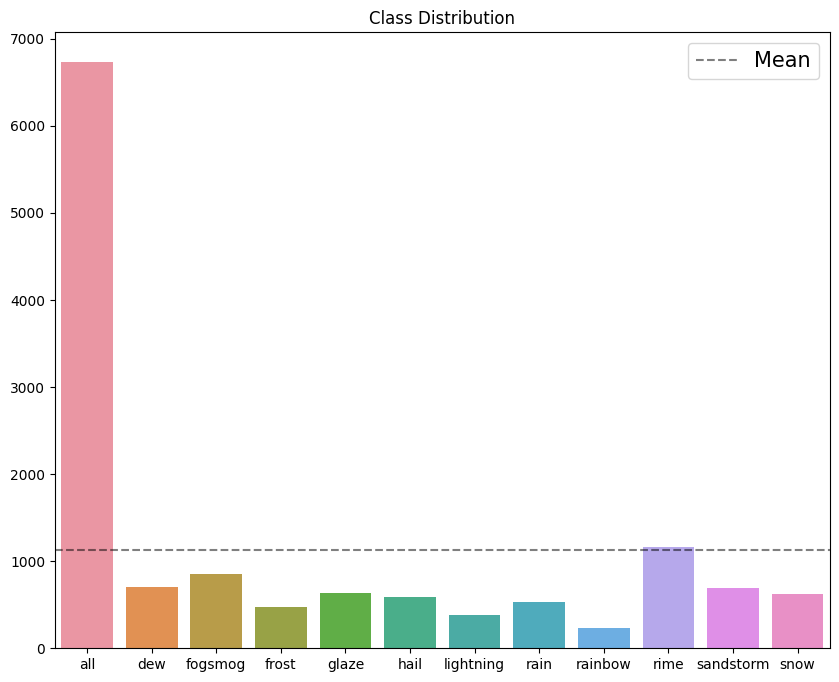

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(
    x=class_names, 
    y=class_dis
)
plt.axhline(np.mean(class_dis), alpha=0.5, linestyle='--', color='k', label="Mean")
plt.title("Class Distribution")
plt.legend(fontsize=15)
plt.show()

In [19]:
# Initialize DataGenerator
train_gen = IDG(rescale=1./255, horizontal_flip=True, rotation_range=20, validation_split=0.2)

# Load Data
train_ds = train_gen.flow_from_directory(root_path, target_size=(256,256), class_mode="binary", subset='training', shuffle=True, batch_size=32)
valid_ds = train_gen.flow_from_directory(root_path, target_size=(256,256), class_mode="binary", subset='validation', shuffle=True, batch_size=32)

Found 10883 images belonging to 12 classes.
Found 2716 images belonging to 12 classes.


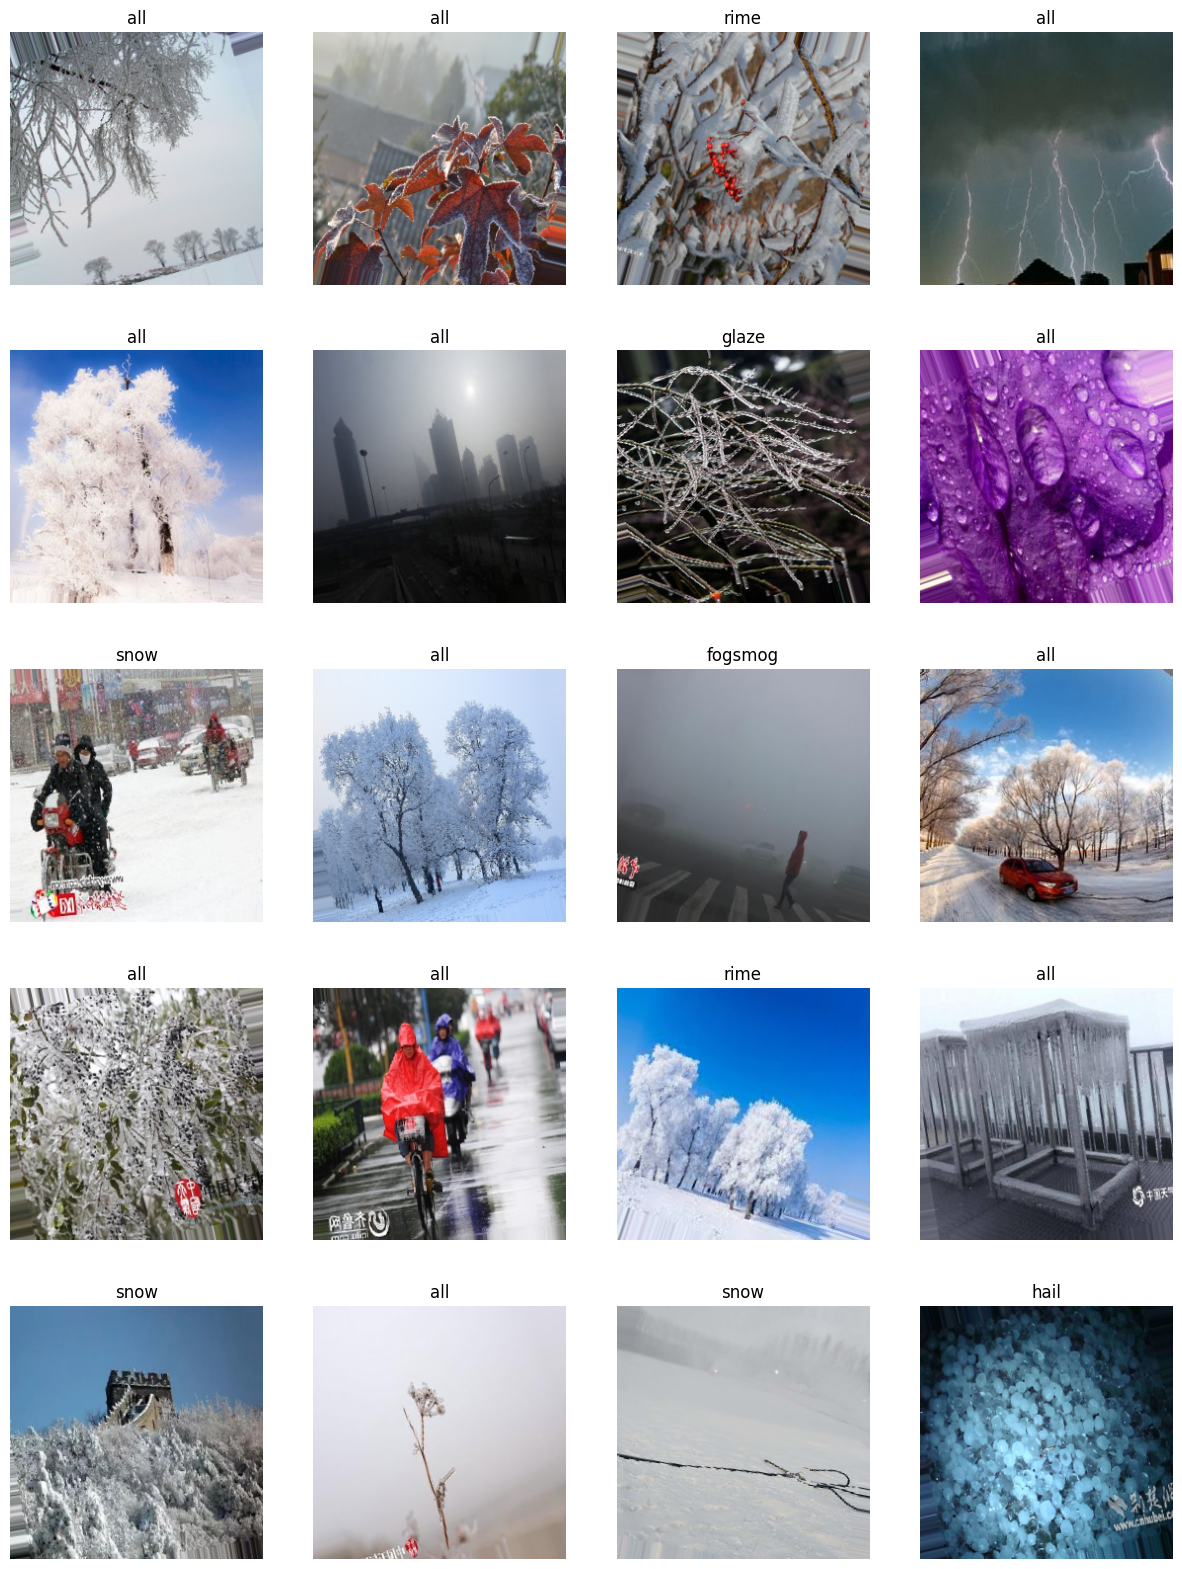

In [20]:
i=1
plt.figure(figsize=(15,20))
for images, labels in train_ds:
    id = np.random.randint(len(images))
    image, label = images[id], int(labels[id])

    plt.subplot(5, 4, i)
    plt.imshow(image)
    plt.title(class_names[label])
    plt.axis('off')

    i+=1
    if i>=21: break

plt.show()

In [21]:
name = 'resnet'
# TL Model
base_model = ResNet152V2(include_top=False, input_shape=(256,256,3))
base_model.trainable = False

# Model
model = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation="softmax")
])

# Compile
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']

)

# Callbacks
cbs = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint(name + ".h5", save_best_only=True)
]

In [22]:
# model.fit(train_ds, epochs=2, callbacks=cbs, validation_data=valid_ds)

In [23]:
model = load_model('resnet.h5')

1/1 [==============================] - 0s 173ms/step


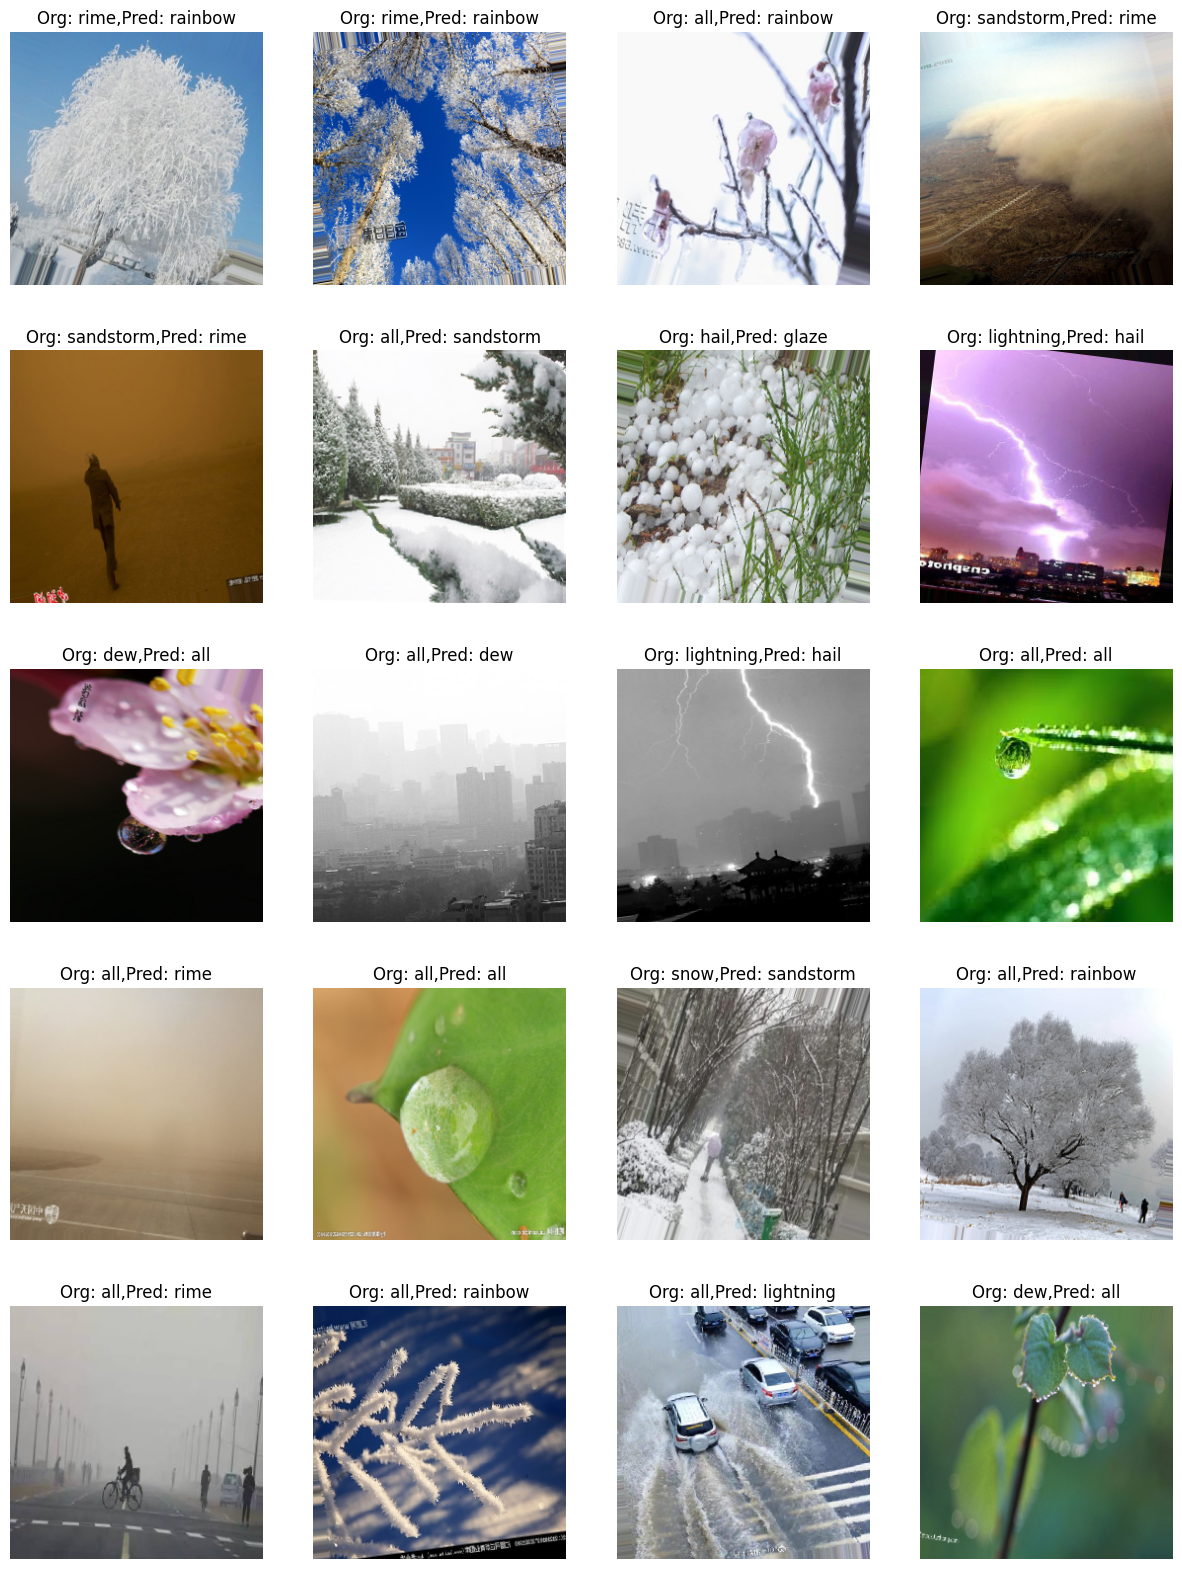

In [24]:
i=1
plt.figure(figsize=(15,20))
for images, labels in train_ds:
    id = np.random.randint(len(images))
    image, label = images[id], int(labels[id])
    pred_label = class_names[np.argmax(model.predict(image[np.newaxis,...]))]

    plt.subplot(5, 4, i)
    plt.imshow(image)
    plt.title(f"Org: {class_names[label]},Pred: {pred_label}")
    plt.axis('off')

    i+=1
    if i>=21: break

plt.show()

In [25]:
# model.evaluate(valid_ds)